<a href="https://colab.research.google.com/github/gerhardteduardo/physics-computational/blob/main/onion_graph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [161]:
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [177]:
def F_xn(x, n):
  if (n == 0):
    return x
  elif (n < 0):
    return x**(1/(-1 * n))
  else:
    return x**n

In [171]:
N = 1000
x = np.linspace(0, 1, N)

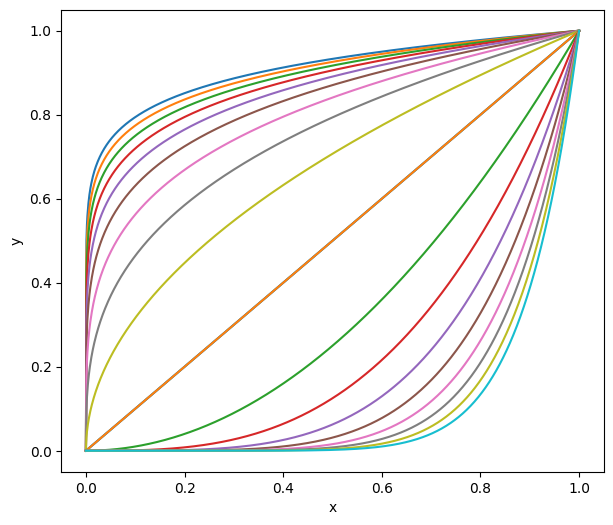

In [178]:
plt.figure(figsize=(7, 6))
for i in range(-10, 10):
  plt.plot(x, F_xn(x, i), label=f'x^{i}')
plt.xlabel('x')
plt.ylabel('y')
plt.margins(0.05)
plt.show()

In [179]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_title('by Eduardo Gerhardt & Gemini Pro 2.5')
ax.set_xlabel('x')
ax.set_ylabel('y')

exponents = np.arange(-5, 5, 0.5)

lines = []
for n in exponents:
    line, = ax.plot([], [], lw=2, label=f'$x^{{{n:.1f}}}$')
    lines.append(line)

y_data = []
N = 100
x_full = np.linspace(0, 1, N)

for n in exponents:
    y_data.append(F_xn(x_full, n))

def update(frame_index):
    for i, line in enumerate(lines):
        y_slice = y_data[i][:frame_index + 1]
        x_slice = x_full[:frame_index + 1]
        line.set_data(x_slice, y_slice)
    return lines

ani = animation.FuncAnimation(
    fig,
    update,
    frames=N,
    interval=20,
    blit=True
)

plt.margins(0.05)
plt.legend(loc='best')
ani.save('onion_animation.mp4', writer='ffmpeg', fps=30)
plt.close(fig)